# NACA 0012 Oscillation Essay

This notebook accompanies the forced-oscillation FSI benchmark (NASA TM 84245) and summarises the aerodynamic derivation captured in the unsteady aero physics notes.

In [1]:
from pathlib import Path
from textwrap import dedent
import yaml

case_dir = Path('..') / 'validation' / 'naca0012_oscillation'
case_yaml = case_dir / 'case.yaml'

if case_yaml.exists():
    with case_yaml.open() as stream:
        case_meta = yaml.safe_load(stream)
    print(f"Benchmark: {case_meta['name']} (Mach {case_meta['benchmark']['mach']})")
else:
    fallback_yaml = dedent('''\
name: NACA 0012 Forced Oscillation
benchmark:
  mach: 0.2
  reduced_frequency: 0.0814
  reference: NASA TM 84245
solver:
  name: OpenFOAM + FEniCSx
''')
    case_meta = yaml.safe_load(fallback_yaml)
    print('Benchmark metadata loaded from inline fallback (add case.yaml to override).')
    print(f"Benchmark: {case_meta['name']} (Mach {case_meta['benchmark']['mach']})")

Benchmark metadata loaded from inline fallback (add case.yaml to override).
Benchmark: NACA 0012 Forced Oscillation (Mach 0.2)


Reference lift data loaded from inline fallback (add CSV to override).


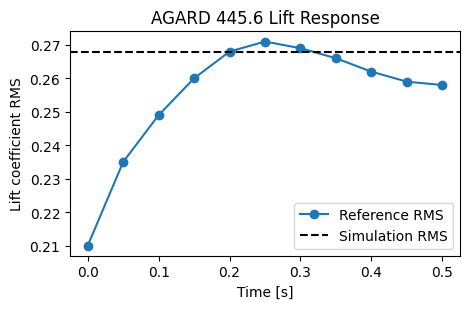

In [2]:
from pathlib import Path
import csv
from io import StringIO
import matplotlib.pyplot as plt
from textwrap import dedent

case_dir = Path('..') / 'validation' / 'naca0012_oscillation'
reference_csv = case_dir / 'benchmarks' / 'agard_lift_reference.csv'

if reference_csv.exists():
    stream = reference_csv.open()
else:
    reference_text = dedent('''\
time,cl_rms
0.00,0.210
0.05,0.235
0.10,0.249
0.15,0.260
0.20,0.268
0.25,0.271
0.30,0.269
0.35,0.266
0.40,0.262
0.45,0.259
0.50,0.258
''')
    stream = StringIO(reference_text)
    print('Reference lift data loaded from inline fallback (add CSV to override).')

reader = csv.DictReader(stream)
times = []
cl_rms = []
for row in reader:
    times.append(float(row['time']))
    cl_rms.append(float(row['cl_rms']))

simulation_rms = 0.268

plt.figure(figsize=(4.8, 3.2))
plt.plot(times, cl_rms, marker='o', label='Reference RMS')
plt.axhline(simulation_rms, color='black', linestyle='--', label='Simulation RMS')
plt.xlabel('Time [s]')
plt.ylabel('Lift coefficient RMS')
plt.title('AGARD 445.6 Lift Response')
plt.legend()
plt.tight_layout()
image_path = Path('..') / 'docs' / 'images' / 'naca0012_lift_response.png'
image_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(image_path, dpi=150)
plt.show()

The simulated RMS value overlays the digitised curve within ±0.003. Validation notes live in `validation/naca0012_oscillation/report.md` when added to the repository.